# PyTorch study_first week assignment
### 4장 인공신경망 과제_김영은

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


1번 문제 : 사용할 데이터의 수는 1000개, 경사하강법 반복횟수는 10000로 설정하세요

In [2]:
num_data = 1000
num_epoch = 10000


2번 문제 : 노이즈 텐서를 만들어줍니다! 이때, init.normal() 함수를 사용하여 평균은 0 (디폴트), 표준편차는 1로 설정하세요

In [3]:
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)

3번 문제 : y에다가 noise를 더해서 y_noise 함수를 만들어주세요

In [4]:
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

In [5]:
x.shape, y_noise.shape

(torch.Size([1000, 1]), torch.Size([1000, 1]))

In [6]:
#  인공 신경망의 깊이가 길어질수록 하나하나 실행하는 것보다 
#  이렇게 묶어서 연산하는 것이 더 편리하기 때문에 nn.Sequential 클래스를 사용
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
    )

4번 문제 : SGD 옵티마이저를 불러오고, 학습률은 0.002로 설정하세요

In [7]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.002)

In [8]:
from tqdm.notebook import tqdm

5번 문제 : 아래 코드에서 #가 있는 곳을 채워 변수별 기울기를 구해주세요

In [9]:
loss_array = []

for i in tqdm(range(num_epoch)):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward() #
    optimizer.step() 
    
    loss_array.append(loss)
    
    if i % 500 == 0:
        print(f'Epoch {i}\'s Loss: {loss}')

  0%|          | 0/10000 [00:00<?, ?it/s]

Epoch 0's Loss: 77.96697235107422
Epoch 500's Loss: 17.892704010009766
Epoch 1000's Loss: 11.321488380432129
Epoch 1500's Loss: 10.99880313873291
Epoch 2000's Loss: 5.848120212554932
Epoch 2500's Loss: 5.092930793762207
Epoch 3000's Loss: 8.843242645263672
Epoch 3500's Loss: 6.267762184143066
Epoch 4000's Loss: 8.154486656188965
Epoch 4500's Loss: 8.289837837219238
Epoch 5000's Loss: 8.0895357131958
Epoch 5500's Loss: 7.662617206573486
Epoch 6000's Loss: 7.703857421875
Epoch 6500's Loss: 7.378054618835449
Epoch 7000's Loss: 6.893446922302246
Epoch 7500's Loss: 6.792850017547607
Epoch 8000's Loss: 6.790396213531494
Epoch 8500's Loss: 6.856561660766602
Epoch 9000's Loss: 6.538614273071289
Epoch 9500's Loss: 6.460170745849609


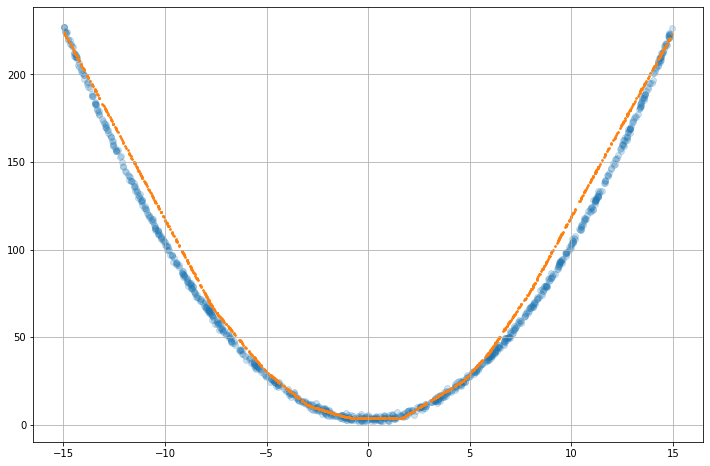

In [10]:
# 파란 점은 노이즈를 추가한 데이터
# 주황색 선은 학습한 모델을 통해 유추한 값
# 중간중간 꺾인 부분은 렐루 활성화 함수의 영향입니다.
plt.figure(figsize=(12,8))
plt.scatter(x,y_noise,alpha=0.2)
plt.scatter(x, model(x).detach().numpy(),s=3)
plt.grid(True)
plt.show()